In [13]:
import matplotlib.pyplot as plt
import numpy as np
from CA_model import CA_model
import evaluation
import iceing
import scipy.stats as stats
from skimage.transform import resize

In [14]:
iceing_test = iceing.iceing_model(0.45, 100)

In [15]:
ponds, sums = iceing_test.run(15_000_000)

In [16]:
areas_ising, perimeters_ising = evaluation.perim_area(ponds, pond_val = -1, ice_val = 1)

In [17]:
# replacement for CA model
size = 100
h_norm = np.random.normal(loc = 0.5, scale = 1, size = (int(size/3), int(size/3)))
h_norm = resize(h_norm, (size, size))
h_norm = np.heaviside(h_norm-0.6, 0) * h_norm

areas_norm, perimeters_norm = evaluation.perim_area(np.where(h_norm>0, -1, 1), pond_val = -1, ice_val = 1)

1. Bootstrap
    - resample with replacenemt from area and parimeter pairs
    - sample the same size as there are points (full array length)
    -
2. Func for calculate inflection point from the S curve
    - areas,dim

-> now we have 100 inflection values
-> do these inflection values - the average inflection value

In [ ]:
def fractal_dim(ponds, pond_val=-1, ice_val=1, bins=50, min_area=0):
    # get areas and perimeters
    areas, perimeters = perim_area(ponds, pond_val=pond_val, ice_val=ice_val)

    # sort arrays
    areas, perimeters = zip(*sorted(zip(areas, perimeters)))
    areas = np.array(areas)
    perimeters = np.array(perimeters)[areas >= min_area]
    areas = areas[areas >= min_area]

    # bin data and get the lowest perimeter for fitting
    areas, perimeters = get_lowest(areas, perimeters, bins=bins)

    try:
        # Perform curve fitting
        fit_params, pcov = curve_fit(integral_D, np.log10(areas), np.log10(perimeters), p0=None)

        # calculate the expected values
        y_expect = D(np.log10(areas), *fit_params[:4])
    except:  # RuntimeError:
        return np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

    if len(areas > 7):
        Dims = []
        for i in range(3, len(areas) - 3):
            dim = 2 * (np.log(perimeters[i + 3]) - np.log(perimeters[i - 3])) / (
                        np.log(areas[i + 3]) - np.log(areas[i - 3]))
            Dims.append(dim)

        return areas, y_expect, pcov, areas[3:-3], np.array(Dims)

    else:
        return areas, y_expect, pcov, np.array([]), np.array([])

/Users/paulhosek/PycharmProjects/ComplexSystemSimulation/evaluation.py:125: RuntimeWarning: overflow encountered in cosh
  except:  # RuntimeError:


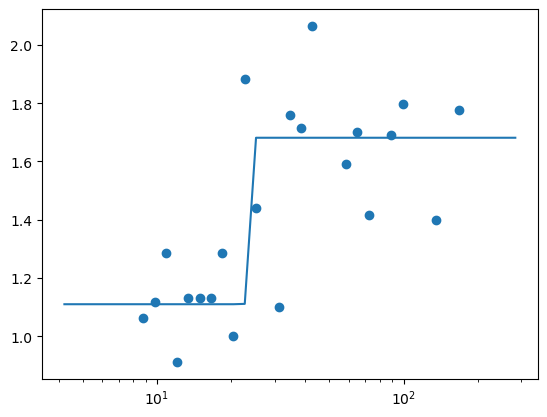

In [18]:
areas_dim, dimensions, _, areas_scatter, dimensions_scatter = evaluation.fractal_dim(ponds, -1, 1, 50)
plt.plot(areas_dim, dimensions)
plt.scatter(areas_scatter, dimensions_scatter)

plt.xscale('log')